# Naive Bayes homework with Yelp review text

## Task 1

Read `yelp.csv` into a DataFrame.

In [3]:
import pandas as pd
yelp = pd.read_csv('homework_data/Homework4_Naive_Bayes_Text/yelp.csv')
yelp.head(1)

FileNotFoundError: File b'homework_data/Homework4_Naive_Bayes_Text/yelp.csv' does not exist

## Task 2

Create a new DataFrame that only contains the 5-star and 1-star reviews.

In [2]:
# filter the DataFrame using an OR condition
yelp_best_worst = yelp[(yelp.stars == 1) | (yelp.stars == 5)]

## Task 3

Split the new DataFrame into training and testing sets, using the review text as the only feature and the star rating as the response.

In [3]:
# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars

In [4]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Task 4

Use CountVectorizer to create document-term matrices from X_train and X_test.

In [7]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [8]:
# fit and transform X_train, but only transform X_test
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

## Task 5

Use Naive Bayes to predict the star rating for reviews in the testing set, and calculate the accuracy.

In [9]:
# import/instantiate/fit
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [10]:
# make class predictions
y_pred_class = nb.predict(X_test_dtm)

In [11]:
# calculate accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.91878669275929548

## Task 6

Calculate the AUC.

In [13]:
y_test[0:10].values

array([5, 5, 5, 5, 5, 1, 1, 5, 5, 5], dtype=int64)

In [14]:
import numpy as np
y_test_binary = np.where(y_test == 5, 1, 0)
y_test_binary[0:10]

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [16]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([  1.00000000e+00,   9.99759874e-01,   1.00000000e+00, ...,
         1.00000000e+00,   1.05200807e-19,   9.99915316e-01])

In [17]:
metrics.roc_auc_score(y_test_binary, y_pred_prob)

0.94035358514060385

## Task 7

Plot the ROC curve.

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

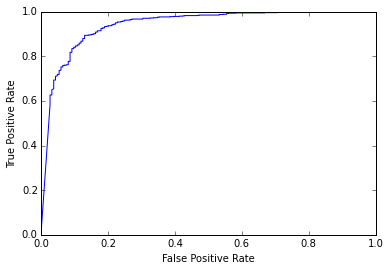

In [20]:
# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Task 8

Print the confusion matrix. Comment on the results.

In [21]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[126,  58],
       [ 25, 813]])

## Task 9

Browse through the review text for some of the false positives and false negatives. Based on your knowledge of how Naive Bayes works, do you have any theories about why the model is incorrectly classifying these reviews?

In [26]:
# false positives
X_test[y_test < y_pred_class][0:10]
X_test[1781]
X_test[1919]

'D-scust-ing.'

In [28]:
# false negatives
X_test[y_test > y_pred_class][0:10]

7148    I now consider myself an Arizonian. If you dri...
4963    This is by far my favourite department store, ...
6318    Since I have ranted recently on poor customer ...
380     This is a must try for any Mani Pedi fan. I us...
5565    I`ve had work done by this shop a few times th...
3448    I was there last week with my sisters and whil...
6050    I went to sears today to check on a layaway th...
2504    I've passed by prestige nails in walmart 100s ...
2475    This place is so great! I am a nanny and had t...
241     I was sad to come back to lai lai's and they n...
Name: text, dtype: object

## Task 10


Let's see how well Naive Bayes performs when all reviews are included, rather than just 1-star and 5-star reviews:

- Define X and y using the original DataFrame from step 1. (y should contain 5 different classes.)
- Split the data into training and testing sets.
- Calculate the testing accuracy of a Naive Bayes model.
- Compare the testing accuracy with the null accuracy.
- Print the confusion matrix.
- Comment on the results.

In [29]:
# define X and y using the original DataFrame
X = yelp.text
y = yelp.stars

In [30]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [32]:
# fit a Naive Bayes model
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
# make class predictions
y_pred_class = nb.predict(X_test_dtm)

In [34]:
# calculate the testing accuary
metrics.accuracy_score(y_test, y_pred_class)

0.47120000000000001

In [37]:
# calculate the null accuracy
y_test.value_counts()[4] / float(len(y_test))

0.35360000000000003

In [42]:
# print the confusion matrix
data = metrics.confusion_matrix(y_test, y_pred_class, labels=[1,2,3,4,5])
pd.DataFrame(data, columns=[1,2,3,4,5], index=[1,2,3,4,5])

,1,2,3,4,5
1,55,14,24,65,27
2,28,16,41,122,27
3,5,7,35,281,37
4,7,0,16,629,232
5,6,4,6,373,443


In [44]:
# comment on your results
y_test.value_counts()

4    884
5    832
3    365
2    234
1    185
Name: stars, dtype: int64